In [23]:
##2023AIML573
#Regression analysis mini project
#Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing SK learn related libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

Read Bag price data from Loacl folder BagDataset.csv

In [26]:
# FILEPATH: /path/to/your/csv/file.csv
BagDf = pd.read_csv('/home/preethi/Work/GITAIML/AIML/regression/BagDataset.csv')

# Display the DataFrame
print(BagDf.head(2))


    Cost  Weight  Weight1  Length  Height   Width
0  242.0    23.2     25.4    30.0   11.52  4.0200
1  290.0    24.0     26.3    31.2   12.48  4.3056


<H1><span style="color: Blue;">1. Analyze the dataset and do EDA</span></H1>

<H3>Start EDA steps to analyze and understand the data</H3>

<span style="color: green;">
Step 1:</span> 
head(),tail(),describe(),shape,info(),value_counts(),groupby(),pivot_table(),corr()

In [27]:
print(BagDf.head(5))

    Cost  Weight  Weight1  Length   Height   Width
0  242.0    23.2     25.4    30.0  11.5200  4.0200
1  290.0    24.0     26.3    31.2  12.4800  4.3056
2  340.0    23.9     26.5    31.1  12.3778  4.6961
3  363.0    26.3     29.0    33.5  12.7300  4.4555
4  430.0    26.5     29.0    34.0  12.4440  5.1340


In [28]:
print(BagDf.tail(5))

     Cost  Weight  Weight1  Length  Height   Width
154  12.2    11.5     12.2    13.4  2.0904  1.3936
155  13.4    11.7     12.4    13.5  2.4300  1.2690
156  12.2    12.1     13.0    13.8  2.2770  1.2558
157  19.7    13.2     14.3    15.2  2.8728  2.0672
158  19.9    13.8     15.0    16.2  2.9322  1.8792


In [29]:
print(BagDf.describe())

              Cost      Weight     Weight1      Length      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [30]:
print(BagDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
None


Print shape to understand data set size and feature size

In [31]:
print(BagDf.shape)

(159, 6)


#printing not null values count unique values
with this we can get an overview of datavalues and  their distribution

In [32]:
#printing not null values count unique values
value_counts_Cost = BagDf['Cost'].value_counts(dropna=True, sort=True)
value_counts_Weight = BagDf['Weight'].value_counts(dropna=True, sort=True)
value_counts_Weight1 = BagDf['Weight1'].value_counts(dropna=True, sort=True)
value_counts_Length = BagDf['Length'].value_counts(dropna=True, sort=True)
value_counts_Height = BagDf['Height'].value_counts(dropna=True, sort=True)
value_counts_Width = BagDf['Width'].value_counts(dropna=True, sort=True)
print("Cost \n {}  weight \n{}   Weight1\n{}  Length\n{}  Height\n{}  Width\n{}".format(value_counts_Cost,value_counts_Weight,value_counts_Weight1,value_counts_Length,value_counts_Height,value_counts_Width))


Cost 
 Cost
300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: count, Length: 101, dtype: int64  weight 
Weight
19.0    6
20.0    5
22.0    4
20.5    4
25.4    3
       ..
33.7    1
25.6    1
24.1    1
22.1    1
13.2    1
Name: count, Length: 116, dtype: int64   Weight1
Weight1
22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
19.6    1
21.3    1
22.7    1
24.6    1
14.3    1
Name: count, Length: 93, dtype: int64  Length
Length
23.5    5
25.0    3
22.5    3
34.0    3
45.5    3
       ..
27.9    1
26.8    1
26.7    1
27.2    1
15.2    1
Name: count, Length: 124, dtype: int64  Height
Height
11.1366    2
5.6925     2
2.2139     2
6.1100     2
9.6000     2
          ..
8.8768     1
8.5680     1
9.4850     1
8.3804     1
2.9322     1
Name: count, Length: 154, dtype: int64  Width
Width
3.5250    3
1.1484    2
4.3350    2
4.1440    2
6.1440    2
         ..
3.9060    1
4.4968    1
4.7736    1
5.35

There is <span style="color: red;">no categorical variable hence group by  & pivot_table might not give relevant insights</span>

In [33]:
print( BagDf.groupby(['Cost']).first())

        Weight  Weight1  Length   Height   Width
Cost                                            
0.0       19.0     20.5    22.8   6.4752  3.3516
5.9        7.5      8.4     8.8   2.1120  1.4080
6.7        9.3      9.8    10.8   1.7388  1.0476
7.0       10.1     10.6    11.6   1.7284  1.1484
7.5       10.0     10.5    11.6   1.9720  1.1600
...        ...      ...     ...      ...     ...
1100.0    39.0     42.0    44.6  12.8002  6.8684
1250.0    52.0     56.0    59.7  10.6863  6.9849
1550.0    56.0     60.0    64.0   9.6000  6.1440
1600.0    56.0     60.0    64.0   9.6000  6.1440
1650.0    59.0     63.4    68.0  10.8120  7.4800

[101 rows x 5 columns]


Get the correlation matrix

In [34]:
correlation_matrix = BagDf.corr().round(2)
print(correlation_matrix)

         Cost  Weight  Weight1  Length  Height  Width
Cost     1.00    0.92     0.92    0.92    0.72   0.89
Weight   0.92    1.00     1.00    0.99    0.63   0.87
Weight1  0.92    1.00     1.00    0.99    0.64   0.87
Length   0.92    0.99     0.99    1.00    0.70   0.88
Height   0.72    0.63     0.64    0.70    1.00   0.79
Width    0.89    0.87     0.87    0.88    0.79   1.00


<span style="color: green;">From the correlation matrix we see the following insights</span>
1. Cost of the bag is highly positively correlated to  weight,weight1,length,Heihgt,width   >0.7
2. Weight1 & length are highly correlated to Weight(1,0.99). so instead of using mutiple feature they can be combined and single feature weight cab ebe used

<span style="color: red;">3. After dropping features weight1,length. we will have following feature weight,height,width</span>

# Count the number of missing values in each column of the DataFrame

In [35]:
null_counts = BagDf.isnull().sum() 
print(null_counts)

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


This a clean data set with <span style="color: green;">no null value.</span> so techiniques like imputing,row,column drop are not needed.
dropna(),fillna(),replace(),duplicated(),drop_duplicates(),astype(), str.strip(),str.lower(), rename(),merge()  are not used as data is clean

<h3>NO data cleaning activity is needed so not performed</h3>

<H1><span style="color: blue;">2. Plotting of various graphs & correlations </span></H1>

<H3>step 1:</H3>
Cost distribution via histogram

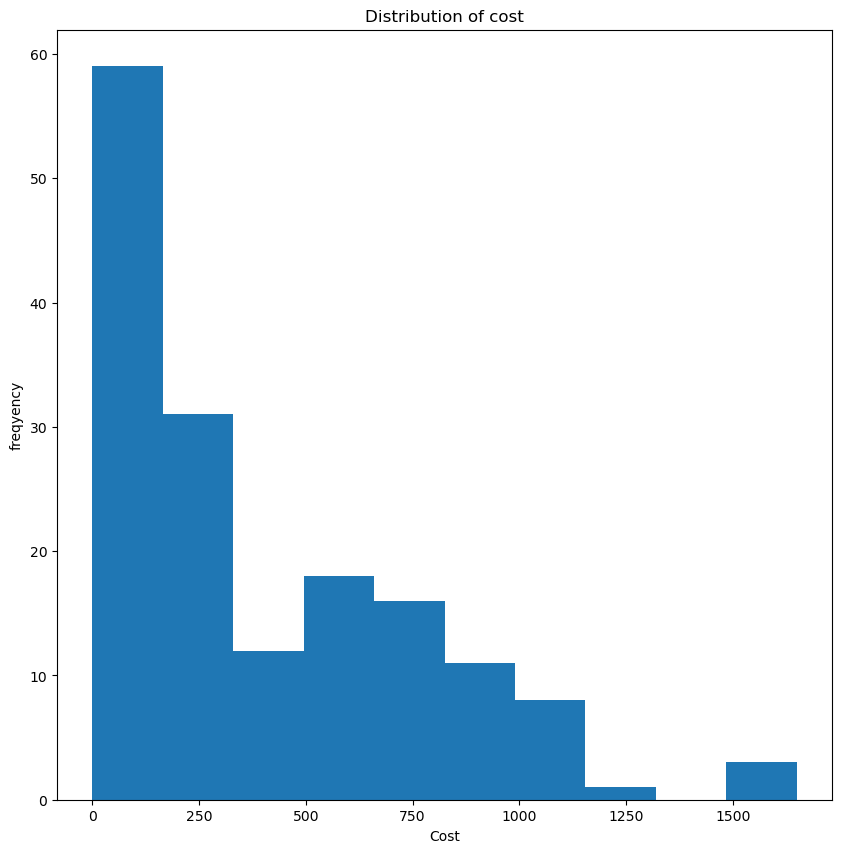

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(data=BagDf, x='Cost', bins=10)
plt.xlabel('Cost')
plt.ylabel('freqyency')
plt.title('Distribution of cost')
plt.show()


Cost is distributed half normal distribution with peak binned between 0-250 INR. 1500-1750 is an outlier in terms of frequency distribution

<H3>step2 :</H3>
Heat map for correlation matrix

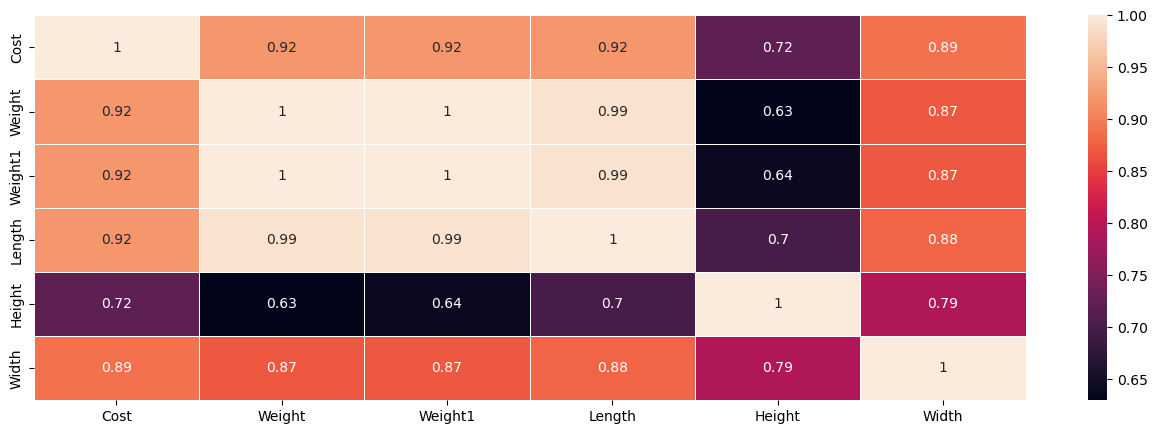

In [38]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5)
plt.show()